In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Yorqinoyyy/agrobank_mockdata/refs/heads/main/agrobank_mocdata_taxlil1%20(2).csv', index_col=[0])
df2.head()

,Region,Customer_ID,Customer_Name,Gender,Age,Credit_Type,Credit_Amount,Interest_Rate,Loan_Term_Months,Start_Date,Payment_Status,Occupation,Account_Balance,region,district,district_population,branch_count,clients_in_district_rows,active_clients_district
0,Surxondaryo viloyati - Sherobod,d19911e6-91ca-43cb-a47e-cc29c24337b1,Brittany Aguilar,ayol,19,Ipoteka,340368908,14.32,48,2022-11-26,Kechikkan,Tadbirkor,19172711,Jizzax,G‘allaorol,17080,1,240,1129
1,Samarqand viloyati - Kattaqo‘rg‘on,40fba3a7-bbaa-4da7-8cdf-cd44c66f2ba2,James Carpenter,ayol,40,Biznes,294857793,23.23,24,2022-03-15,Jarayonda,Tadbirkor,44163771,Andijon,Andijon,535564,6,230,5751
2,Buxoro viloyati - Kogon,f955d5c8-1374-4346-998b-97120cb3b72c,Jorge Parks,ayol,48,Fermerlik,244907261,13.34,72,2024-08-24,Jarayonda,Talaba,75480208,Jizzax,Do‘stlik,92508,1,249,6524
3,Jizzax viloyati - Jizzax,87d64892-6672-4706-a3c3-505171369658,Manuel Richards,erkak,62,Fermerlik,431885936,17.98,72,2020-10-17,To'langan,O'qituvchi,67790378,Toshkent shahri,Shayxontohur,680292,7,83,77932
4,Xorazm viloyati - Yangibozor,442ba79e-91fd-44c2-9fe8-1226d861b7d1,Nicole Vargas,erkak,28,Fermerlik,90015033,15.26,60,2021-01-07,Jarayonda,Talaba,51483536,Jizzax,Jizzax,78543,1,235,3949


In [4]:
df2['Start_Date'].value_counts()

,count
Start_Date,
2021-12-09,17
2022-03-06,17
2022-08-23,14
2023-05-20,14
2021-08-21,14
...,...
2020-12-24,1
2022-04-15,1
2022-07-10,1


In [5]:
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'])
data_21 = df2[df2['Start_Date'].dt.year == 2021]
data_21.head()

,Region,Customer_ID,Customer_Name,Gender,Age,Credit_Type,Credit_Amount,Interest_Rate,Loan_Term_Months,Start_Date,Payment_Status,Occupation,Account_Balance,region,district,district_population,branch_count,clients_in_district_rows,active_clients_district
4,Xorazm viloyati - Yangibozor,442ba79e-91fd-44c2-9fe8-1226d861b7d1,Nicole Vargas,erkak,28,Fermerlik,90015033,15.26,60,2021-01-07,Jarayonda,Talaba,51483536,Jizzax,Jizzax,78543,1,235,3949
5,Farg‘ona viloyati - Marg‘ilon,9a98443d-47f6-4c00-87f6-fe71a4cc8d66,Elizabeth Johnson,erkak,37,Fermerlik,435626937,15.17,36,2021-03-04,Kechikkan,Talaba,16720887,Qashqadaryo,Beshkent,21916,0,78,1784
9,Andijon viloyati - Asaka,751f8723-866b-4638-a53a-7f911bd78e17,Steven Wilson,erkak,60,Ta'lim,351882458,24.37,60,2021-04-22,Kechikkan,Fermer,27186951,Buxoro,G‘ijduvon,62601,2,233,6501
19,Farg‘ona viloyati - Marg‘ilon,a0d106fc-1c7d-47bd-9755-6716a465580a,Michael Fernandez,ayol,64,Biznes,467537411,16.87,72,2021-01-08,Kechikkan,Tadbirkor,23059343,Sirdaryo,Shirin,77686,2,255,9183
24,Xorazm viloyati - Xiva,6a0f9ed1-469b-41d0-8842-94f344fd9b1f,Robert Price,erkak,56,Ipoteka,235366761,24.42,72,2021-10-25,Kechikkan,Boshqaruvchi,70432042,Fargʻona,Qo‘qon,283539,3,211,26120


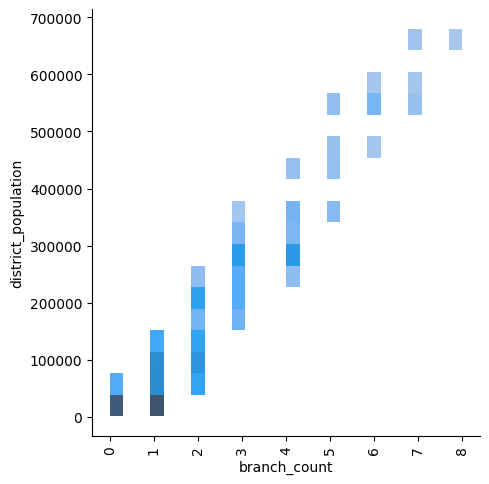

In [6]:
sns.displot(data=data_21, y='district_population', x='branch_count')
plt.xticks(rotation=90)
plt.show()

##2021-yil ma'lumotlari ajratib olindi va tahlil qilindi:

###X o‘qi (branch_count) — har bir tuman yoki shahar bo‘yicha filiallar soni

###Y o‘qi (district_population) — shu tumanning aholisi soni


##📈 Tahlil natijasi:

###1. Grafikda an’anaviy o‘sish yo‘nalishi mavjud — ya’ni aholisi ko‘p tumanlarda filiallar soni ham ko‘paymoqda.


###2.Aholi soni katta (masalan 500–600 ming) hududlarda, filiallar soni ham nisbatan ko'p (5–6 ta atrofida).
👉 Bu shuni bildiradiki, shu tumanlarda yangi filial ochish imkoniyati mavjud emas.


###3. 0–1 filialga ega bo‘lgan, ammo aholisi 100 mingdan oshgan hududlar — eng ustuvor joylar hisoblanadi.


###4. Umuman olganda, bu grafikdan aholi va filiallar soni o‘rtasidagi bog‘liqlikni ko‘rish mumkin.

In [7]:
df2['Start_Date'] = pd.to_datetime(df2['Start_Date'])
data_23 = df2[df2['Start_Date'].dt.year == 2023]
data_23.head()

,Region,Customer_ID,Customer_Name,Gender,Age,Credit_Type,Credit_Amount,Interest_Rate,Loan_Term_Months,Start_Date,Payment_Status,Occupation,Account_Balance,region,district,district_population,branch_count,clients_in_district_rows,active_clients_district
7,Sirdaryo viloyati - Sirdaryo,3ca9895c-a5da-4481-90ed-c395115d4539,Gabrielle Bradshaw,ayol,18,Fermerlik,260883082,15.53,60,2023-03-19,Jarayonda,Ishchi,75816140,Navoiy,Qiziltepa,13911,0,247,598
8,Qashqadaryo viloyati - Qarshi,64bc511f-4384-4ca0-817c-17078488471f,Dr. James Lee,ayol,69,Avtokredit,78639089,12.80,36,2023-03-15,Jarayonda,Fermer,92643382,Fargʻona,Farg‘ona,152849,2,234,5735
10,Namangan viloyati - Pop,74f19cb6-7d08-4ef5-ab84-5faabab911a2,Michael Leach,erkak,64,Ta'lim,22453831,11.68,36,2023-04-25,Kechikkan,Tadbirkor,44374780,Navoiy,Zarafshon,20067,0,227,666
14,Surxondaryo viloyati - Sherobod,34f03dd2-5a0c-4f9f-b1c8-149ad7c5d9de,Jeffrey Wilson,ayol,54,Ta'lim,216800014,12.40,60,2023-02-27,Kechikkan,Talaba,11641784,Buxoro,Buxoro,1000,0,218,59
18,Sirdaryo viloyati - Sirdaryo,c25dbd67-87aa-4f46-ae4a-1508ec4ed7a3,Stephanie Floyd,ayol,46,Biznes,258630424,20.44,48,2023-07-01,Jarayonda,Tadbirkor,97194210,Buxoro,G‘ijduvon,62601,1,233,6501


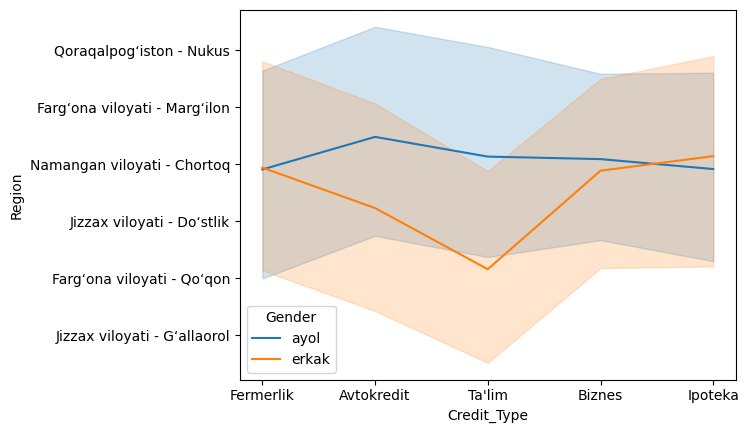

In [8]:
sns.lineplot(data=data_23, x='Credit_Type', y='Region', hue='Gender')
plt.show()

##2023 yildagi ma'lumotlar ajratib olindi va tahlil qiindi

X o‘qi (Credit_Type) — kredit turlari (Fermerlik, Avtokredit, Ta’lim, Biznes, Ipoteka)

Y o‘qi (Region) — viloyatlar

Hue (Gender) — ayollar va erkaklar kredit oluvchilari solishtirilgan.


##📈 Tahlil natijasi:

###1. Ayollar (ko‘k chiziq) va erkaklar (sariq chiziq) o‘rtasidagi farq ayrim kredit turlarida sezilarli.

Masalan, Biznes va Ipoteka kreditlarida erkaklar ulushi yuqoriroq.

Avtokredit va Fermerlikda esa ayollar faolligi biroz ko‘proq.



###2. Ayrim viloyatlarda, masalan Namangan-Chortoqda ayollar kredit faolligi juda yuqori.

###3. Jizzax va Namanganda esa erkaklar kredit oluvchi sifatida ko‘proq faol.

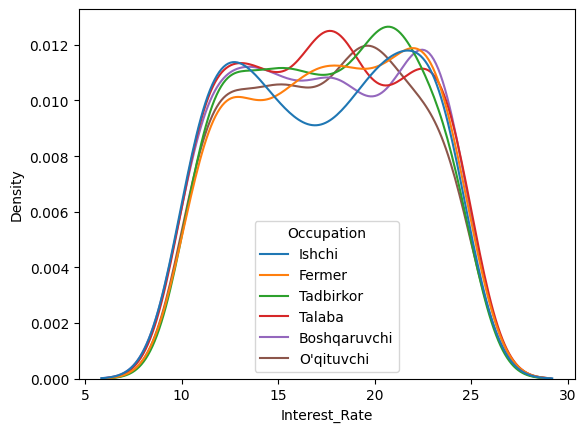

In [9]:
sns.kdeplot(data=data_23, x='Interest_Rate', hue="Occupation")
plt.show()


##2023- ma'lumotlari asosida
X o‘qi (Interest_Rate) → Foiz stavkasi (yillik kredit foizi)

Y o‘qi (Density) → Ma’lumotlarning zichligi (ya’ni foiz stavkasi qanchalik ko‘p kuzatilgan)

Hue (Occupation) → Mijozlarning kasb toifalari (Ishchi, Fermer, Tadbirkor, Talaba, Boshqaruvchi, O‘qituvchi)



---

##📈 Tahlil natijasi:

###1. Umumiy ko‘rinish: Grafik ikki cho‘qqili (bimodal) shaklda — bu shuni anglatadiki, kredit foiz stavkalari asosan ikki asosiy diapazonda jamlangan:

###~10–15% oralig‘ida birinchi cho‘qqi

###~20–25% oralig‘ida ikkinchi cho‘qqi
👉 Demak, kreditlar ikki turdagi segmentga bo‘lingan bo‘lishi mumkin — masalan, imtiyozli va oddiy kreditlar.



###2. Kasblar bo‘yicha farqlar:

####Talabalar (qizil chiziq): Foiz stavkasi pastroq (10–15%) kreditlarga ko‘proq ega. Bu ta’lim krediti yoki imtiyozli kreditlar bilan bog‘liq bo‘lishi mumkin.

####Fermerlar (to‘q yashil chiziq): Ular uchun o‘rta diapazon (15–20%) ko‘proq uchraydi — bu fermerlik kreditlari odatda o‘rta foizda berilishini ko‘rsatadi.

####Tadbirkorlar va boshqaruvchilar (yashil va binafsha chiziq): Ularning foiz stavkalari keng tarqalgan — 10% dan 25% gacha. Bu tadbirkorlik risklari va kredit turlari xilma-xilligi bilan izohlanadi.

####Ishchilar va o‘qituvchilar (ko‘k va jigarrang chiziqlar): Ular uchun foiz stavkalari o‘rtacha diapazonda (15–20%) to‘plangan, bu odatdagi iste’mol kreditlarini anglatadi.



###3. Zichlik (Density):

Eng baland cho‘qqilar 15–18% oralig‘ida joylashgan — demak, ko‘pchilik kreditlar shu foizda berilgan.

25% dan yuqori foizlar juda kam uchraydi — bu yuqori riskli kreditlar bo‘lishi mumkin.
